# OpenCV Primer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from tqdm import tqdm
import cv2
import os
import sys

In [2]:
cwd = os.getcwd()
cat_folder = cwd + '\\train\\cat\\'
dog_folder = cwd + '\\train\\dog\\'

## 1. 读取图片: `cv2.imread` 

- OpenCV读取的图片的颜色通道排列顺序默认是 BGR，而matplotlib则是 RGB

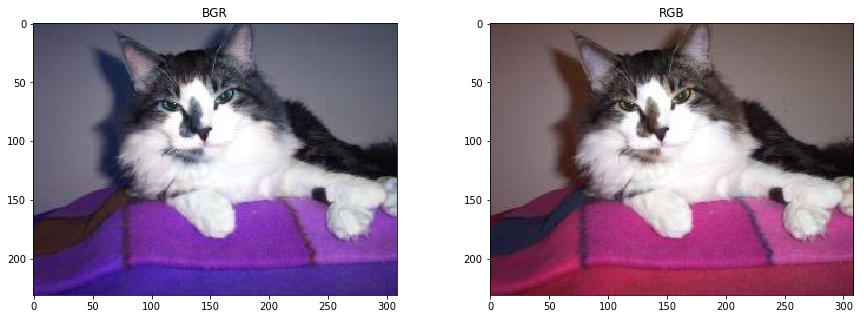

In [69]:
# 色彩通道顺序变换
random_img = np.random.choice(range(12500))
path = cat_folder + str(random_img) + '.jpg'
img = cv2.imread(path)

# 方法1：先分离后合并颜色通道
b,g,r = cv2.split(img)
img_2 = cv2.merge([r,g,b])

# 方法2：使用cvtColor对颜色通道进行转换
img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     

# 方法3：使用Index Slicing的语法
img_2 = img[:, :, ::-1]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('BGR')
plt.subplot(122)
plt.imshow(img_2, cmap='gray')
plt.title('RGB')
plt.show()

## 2. 访问图片的基本属性：体积、尺寸、元素类型

In [70]:
# 像素点个数
img.size

214137

In [71]:
# 高度 x 宽度 x 颜色通道数
img.shape

(231, 309, 3)

In [72]:
# 每个像素点元素的数据类型：1Byte
img.dtype

dtype('uint8')

In [80]:
# 图像矩阵变量的内存占用，单位为Byte
sys.getsizeof(img)

214265

In [81]:
# 由于img本身是np.array，因此除了元素数据外，还封装有其他一些属性信息，这些信息的内存占用为128Byte
sys.getsizeof(img) - img.size

128

In [73]:
print("File Size:", os.path.getsize(path), 'Byte')
print("Array Size:", img.size, 'Byte')
print("JPEG Compress Ratio:", np.round(os.path.getsize(path) / img.size * 100, 2), '%')

File Size: 8909 Byte
Array Size: 214137 Byte
JPEG Compress Ratio: 4.16 %


### 注意绘图的横坐标是第二个维度，纵坐标才是第一个维度

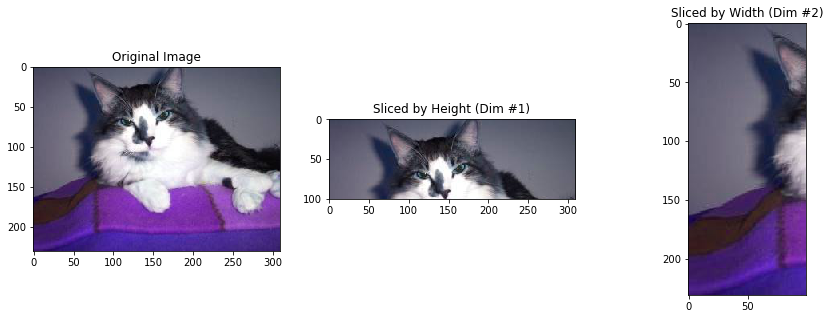

In [79]:
# 第一维度是图片的高度
height_slice = img[:100, :]
# 第二维度是图片的宽度
width_slice = img[:, :100]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(132)
plt.imshow(height_slice, cmap='gray')
plt.title("Sliced by Height (Dim #1)")
plt.subplot(133)
plt.imshow(width_slice, cmap='gray')
plt.title("Sliced by Width (Dim #2)")
plt.show()

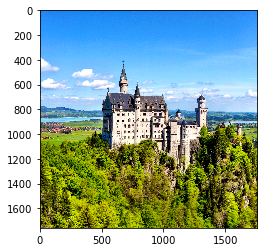

NameError: name 'path' is not defined

In [3]:
img = cv2.imread('view.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)
plt.show()
print("File Size:", os.path.getsize(path), 'Byte')
print("Array Size:", sys.getsizeof(img), 'Byte')
print("JPG Compress Ratio:", np.round(os.path.getsize(path) / sys.getsizeof(img) * 100, 2), '%')

可以看到，对于不同的图片压缩格式和图片内容，其压缩率很不一样。对于这种验证码的图片，由于本身就没什么信息，复杂度较低，因此压缩前后体积变化不大。而对于生活中的物体的图片，由于图片所含的细节很多，因此压缩率可以很高。

## 3. 图像变换

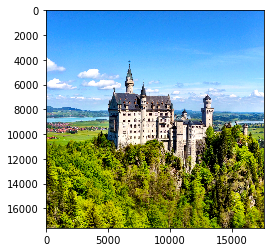

Array Size: 927169200 Bytes
JPG File Size: 36742914 Bytes
PNG File Size: 230686749 Bytes


In [4]:
# 等比例放大100倍，图像体积其实已经增大到200M，但是经过JPG压缩后体积能够缩小至2M，经过无损压缩的PNG图片则需要14M左右。
s = img.shape[0]
img_resize = cv2.resize(img, (s*10, s*10))
plt.imshow(img_resize)
plt.show()
print("Array Size:", img_resize.nbytes, 'Bytes')
b,g,r = cv2.split(img_resize)
img_resize = cv2.merge([r,g,b])
cv2.imwrite('test.jpg', img_resize)
cv2.imwrite('test.png', img_resize)
print("JPG File Size:", os.path.getsize('test.jpg'), 'Bytes')
print("PNG File Size:", os.path.getsize('test.png'), 'Bytes')

### 手写一个棋盘状图片矩阵，然后使用resize看效果

- `cv2.resize` 函数实际上计算的是目的图片到原图片的映射关系（interpolation）。

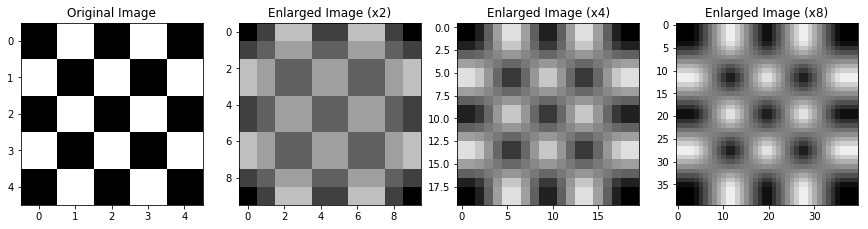

In [55]:
# 放大棋盘
checkerboard = [[0, 255, 0, 255, 0], 
                [255, 0, 255, 0, 255], 
                [0, 255, 0, 255, 0], 
                [255, 0, 255, 0, 255], 
                [0, 255, 0, 255, 0]]
mat = np.array(checkerboard, dtype = np.uint8)
mat = cv2.merge([mat, mat, mat])
mat_resize_x2 = cv2.resize(mat, (10, 10))
mat_resize_x4 = cv2.resize(mat, (20, 20))
mat_resize_x8 = cv2.resize(mat, (40, 40))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x2)
plt.title("Enlarged Image (x2)")
plt.subplot(143)
plt.imshow(mat_resize_x4)
plt.title("Enlarged Image (x4)")
plt.subplot(144)
plt.imshow(mat_resize_x8)
plt.title("Enlarged Image (x8)")
plt.show()

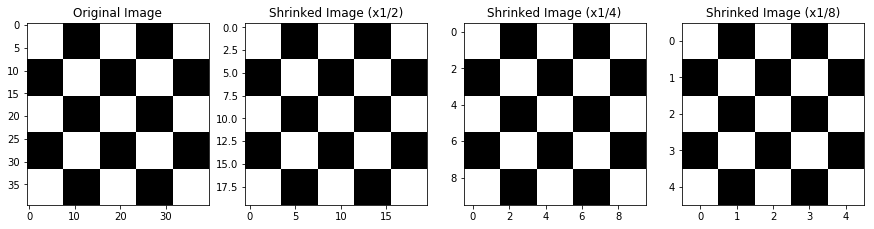

In [58]:
# 缩小棋盘（没有影响）
black = 255 * np.ones((8, 8), dtype=np.uint8)
white = np.zeros((8, 8), dtype=np.uint8)
pattern1 = np.concatenate((black, white, black, white, black), axis=0)
pattern2 = np.concatenate((white, black, white, black, white), axis=0)
mat = np.concatenate((pattern1, pattern2, pattern1, pattern2, pattern1), axis=1)
mat = cv2.merge([mat, mat, mat])
mat_resize_x1_2 = cv2.resize(mat, (20, 20))
mat_resize_x1_4 = cv2.resize(mat, (10, 10))
mat_resize_x1_8 = cv2.resize(mat, (5, 5))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x1_2)
plt.title("Shrinked Image (x1/2)")
plt.subplot(143)
plt.imshow(mat_resize_x1_4)
plt.title("Shrinked Image (x1/4)")
plt.subplot(144)
plt.imshow(mat_resize_x1_8)
plt.title("Shrinked Image (x1/8)")
plt.show()

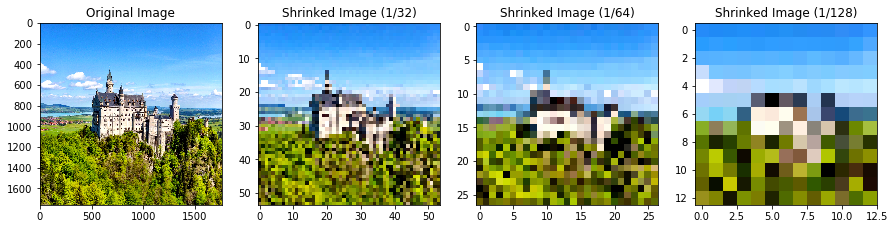

In [73]:
# 缩小风景图片：影响很明显
mat = cv2.imread('view.jpg')
s = mat.shape[0]
b,g,r = cv2.split(mat)
mat = cv2.merge([r,g,b])
mat_resize_x1_2 = cv2.resize(mat, (s//32, s//32))
mat_resize_x1_4 = cv2.resize(mat, (s//64, s//64))
mat_resize_x1_8 = cv2.resize(mat, (s//128, s//128))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x1_2)
plt.title("Shrinked Image (1/32)")
plt.subplot(143)
plt.imshow(mat_resize_x1_4)
plt.title("Shrinked Image (1/64)")
plt.subplot(144)
plt.imshow(mat_resize_x1_8)
plt.title("Shrinked Image (1/128)")
plt.show()

## 4. 绘图

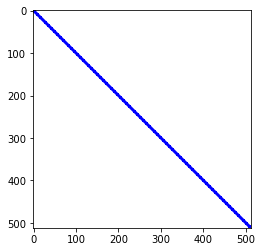

In [4]:
# Blank Canvas
# 0 = Black, 1 = White
img = 255 * np.ones((512, 512, 3), dtype=np.uint8)

# Draw lines
start = (0, 0)
end = (511, 511)
color = (255, 0, 0)
img = cv2.line(img, start, end, color, thickness=5, lineType=cv2.LINE_AA)
img = img[:, :, ::-1]
plt.imshow(img, cmap='gray')
plt.show()

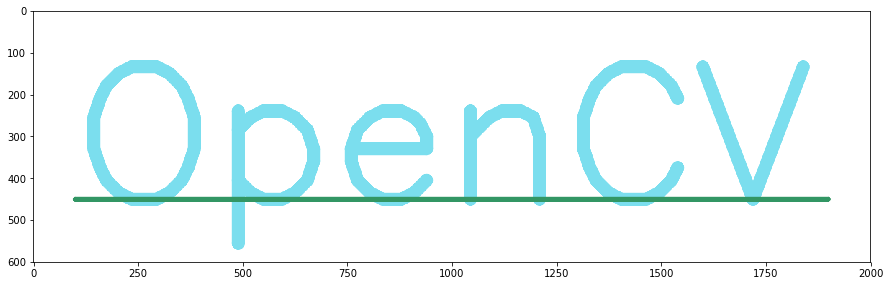

In [56]:
# Blank Canvas
img = 255 * np.ones((600, 2000, 3), dtype=np.uint8)

# Draw Text
img = cv2.putText(img, text='OpenCV', org=(100,450), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=15, 
                  color=(238,222,123), thickness=30, lineType=cv2.LINE_AA)
img = cv2.line(img, (100, 450), (1900, 450), (100, 150, 50), 10, cv2.LINE_AA)

img = img[:, :, ::-1]
plt.figure(figsize=(15,5))
plt.imshow(img, cmap='gray')
plt.show()

## 5. Region of Image (ROI)

- 直接使用 Index Slicing 进行切图


- 注意矩阵的第一维其实才是图片的高度，第二维才是图片的宽度

In [60]:
img.shape

(600, 2000, 3)

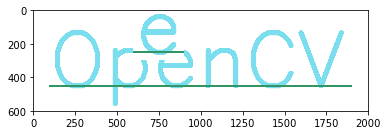

In [59]:
e = img[200:500, 700:1000]
img[0:300, 600:900] = e
plt.imshow(img, cmap='gray')
plt.show()

## 6. Add Padding

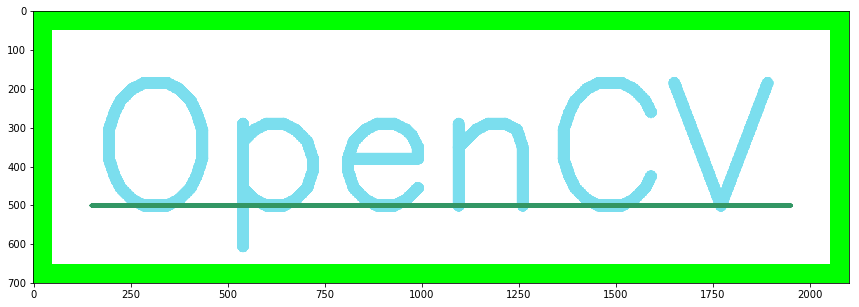

In [55]:
constant_padding = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0, 255, 0])
plt.figure(figsize=(15,5))
plt.imshow(constant_padding, cmap='gray')
plt.show()

## 7. 使用滤波器对图像进行卷积运算

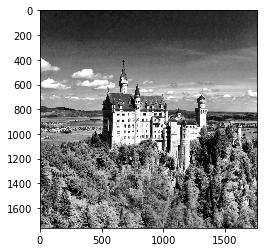

(1760, 1760)

In [16]:
import tensorflow as tf
import tf.nn.conv2d
img = cv2.imread('view.jpg')
img = img[:, :, ::-1]
img = img[:, :, 0]
input = tf.Variable()
kernel = np.array([[0, 255, 0], [0, 255, 0], [0, 255, 0]])
result = convolve2d(img, kernel)
plt.imshow(result, cmap='gray')
plt.show()
result.shape

## 8. 使用 ColorMap 对图像进行着色

实际工作中，我们通常不仅展示图片，还要在图片上进一步标记一些相关数据。例如对于一幅地图来说，我们不仅希望展示这个地图本身的样子，还想要标记地图对应的这片区域的气候温度分布是什么样的，这就涉及到了用 ColorMap 对图像进行着色的工作了。

### 8.1 ColorMap 映射原理

- 本质上任何彩色图像的呈现效果都依赖于你选择的ColorMap，也就是你的**像素数值（0-255）与对应颜色深度的映射关系**。


- 呈现图像最默认的方法是使用灰阶，即在图像的一个通道上，所有像素都显示为同一种颜色，像素值不同只会使这种颜色的深浅不同。像素值越接近0，颜色越接近纯黑色，像素值越接近255，颜色越接近纯白色。然后把不同通道的图像叠加显示，就是标准的彩色图像。反应在下面的城堡图片中，可以看到浅蓝的天空其实是蓝色成分和绿色成分的组合，而森林的颜色则是由绿色成分和红色成分的组合。


- 需要注意的是，这里为了呈现每个通道的颜色，使用了单色的ColorMap: [Reds, Greens, Blues]，而这三种ColorMap默认将像素数值越大，显示颜色越深，与我们之前的灰阶习惯相反，因此我们为了显示正常的颜色，就将图像用255减了下，这样看到的才是真正的单色通道图片形态，颜色越偏白，说明这个颜色通道的成分越重。城堡本体在三个颜色通道上都是白色，因此组合后起来也是白色，而天空是蓝色通道和绿色通道上的图像偏白，因此天空是浅蓝色，同样道理，森林是绿色通道和红色通道上图像偏白，因此森林实际上是绿黄色。


- 与灰阶不同，`JET` 这种常用的ColorMap映射可以让一张图像（没有通道的概念了）上直接显示不同颜色，定义像素数值越接近0，颜色越偏蓝（冷），越接近255，颜色越偏红（热），中间的过渡值（128）则呈现为三原色中剩下的绿色。


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


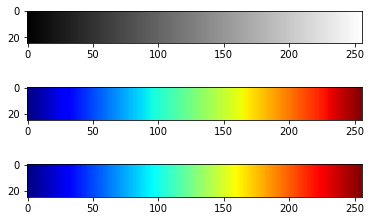

In [36]:
img = np.array([list(range(256))] * 25, dtype=np.uint8)
print(img[0, :20])
plt.subplot(3, 1, 1)
plt.imshow(img, cmap='gray')
plt.subplot(3, 1, 2)
plt.imshow(img, cmap='jet')
plt.subplot(3, 1, 3)
img_jet = cv2.applyColorMap(img, cv2.COLORMAP_JET)
img_jet = img_jet[:, :, ::-1]
plt.imshow(img_jet)
plt.show()

#### 如果矩阵元素取值范围并不在[0, 255]会出现什么现象?

可以看到，取值范围其实根本不重要，因为只要使用了ColorMap，它就会自动计算你所给矩阵中元素的最大最小值，然后根据这个区间范围将矩阵的所有元素值缩放至[0, 255]的范围内的整数，再绘制出来。

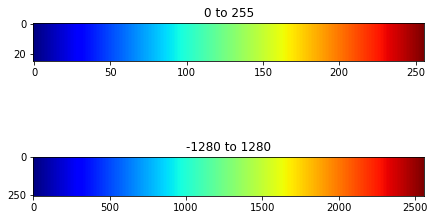

In [162]:
img_0 = np.array([list(range(256))] * 25, dtype=np.uint8)
img_1 = np.array([list(range(-1280, 1280))] * 256, dtype=np.float32)
plt.figure(figsize=(7, 7))
plt.subplot(3, 1, 1)
plt.imshow(img_0, cmap='jet')
plt.title('0 to 255')
plt.subplot(3, 1, 2)
plt.imshow(img_1, cmap='jet')
plt.title('-1280 to 1280')
plt.show()

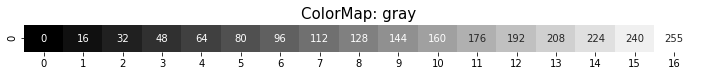

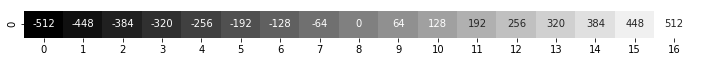

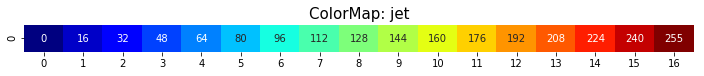

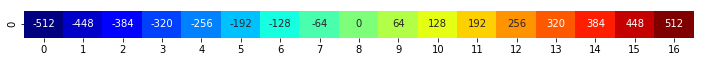

In [158]:
import seaborn as sns
img1 = np.array([list(np.arange(start=0, stop=256, step=16)) + [255]] * 1)
img2 = np.array([list(np.arange(start=-512, stop=512, step=64)) + [512]] * 1)
plt.figure(figsize=(12, 0.5))
sns.heatmap(img1, annot=True, fmt="d", cmap='gray', cbar=False)
plt.title('ColorMap: gray', size=15)
plt.show()
plt.figure(figsize=(12, 0.5))
sns.heatmap(img2, annot=True, fmt='d', cmap='gray', cbar=False)
plt.show()
plt.figure(figsize=(12, 0.5))
sns.heatmap(img1, annot=True, fmt="d", cmap='jet', cbar=False)
plt.title('ColorMap: jet', size=15)
plt.show()
plt.figure(figsize=(12, 0.5))
sns.heatmap(img2, annot=True, fmt='d', cmap='jet', cbar=False)
plt.show()

[0 1 2 3 4 5 6 7 8 9]
[255 254 253 252 251 250 249 248 247 246]


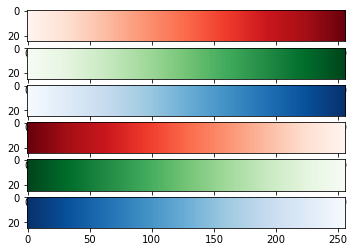

In [62]:
img = np.array([list(range(256))] * 25, dtype=np.uint8)
print(img[0, :10])
plt.subplot(6, 1, 1)
plt.imshow(img, cmap='Reds')
plt.subplot(6, 1, 2)
plt.imshow(img, cmap='Greens')
plt.subplot(6, 1, 3)
plt.imshow(img, cmap='Blues')
img = 255 - img
print(img[0, :10])
plt.subplot(6, 1, 4)
plt.imshow(img, cmap='Reds')
plt.subplot(6, 1, 5)
plt.imshow(img, cmap='Greens')
plt.subplot(6, 1, 6)
plt.imshow(img, cmap='Blues')
plt.show()

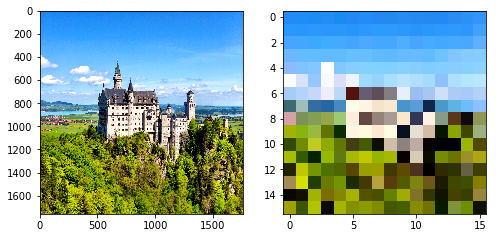

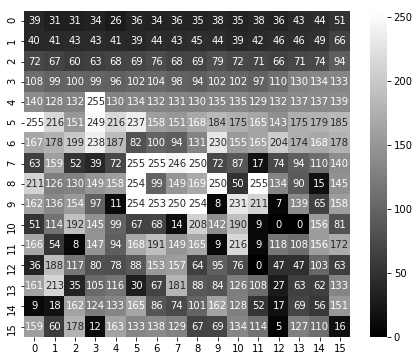

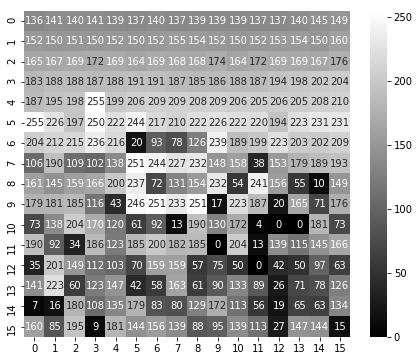

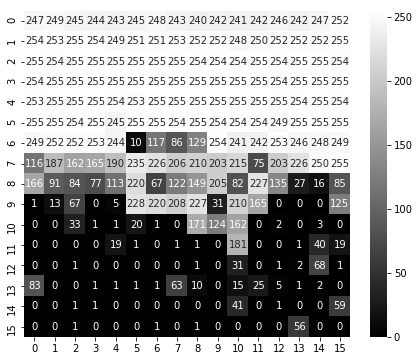

In [135]:
img = cv2.imread('view.jpg')
img = img[:, :, ::-1]
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
img = cv2.resize(img, dsize=(16, 16))
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()
img0 = img[:, :, 0]
plt.figure(figsize=(7.3, 6))
sns.heatmap(img0, annot=True, fmt="d", cmap='gray')
plt.show()
img1 = img[:, :, 1]
plt.figure(figsize=(7.3, 6))
sns.heatmap(img1, annot=True, fmt="d", cmap='gray')
plt.show()
img2 = img[:, :, 2]
plt.figure(figsize=(7.3, 6))
sns.heatmap(img2, annot=True, fmt="d", cmap='gray')
plt.show()

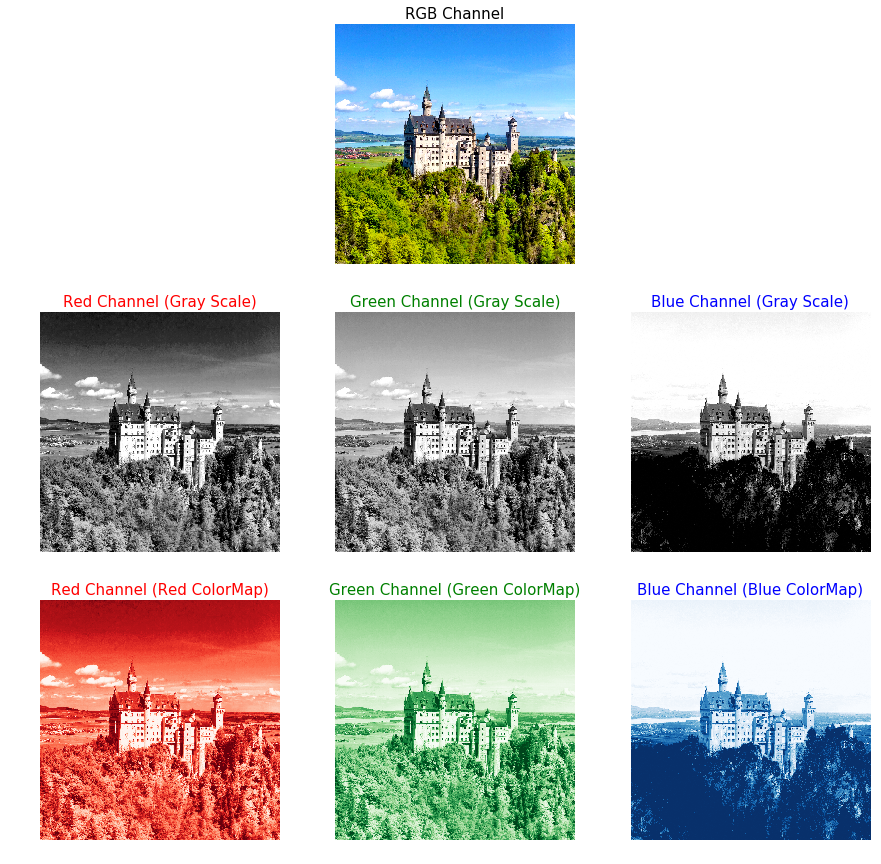

In [59]:
img = cv2.imread('view.jpg')
img = img[:, :, ::-1]
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('RGB Channel', size='15')
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(img[:, :, 0], cmap='gray')
plt.title('Red Channel (Gray Scale)', color='r', size='15')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(img[:, :, 1], cmap='gray')
plt.title('Green Channel (Gray Scale)', color='g', size='15')
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(img[:, :, 2], cmap='gray')
plt.title('Blue Channel (Gray Scale)', color='b', size='15')
plt.axis('off')
img_rev = 255 - img
plt.subplot(3, 3, 7)
plt.imshow(img_rev[:, :, 0], cmap='Reds')
plt.title('Red Channel (Red ColorMap)', color='r', size='15')
plt.axis('off')
plt.subplot(3, 3, 8)
plt.imshow(img_rev[:, :, 1], cmap='Greens')
plt.title('Green Channel (Green ColorMap)', color='g', size='15')
plt.axis('off')
plt.subplot(3, 3, 9)
plt.imshow(img_rev[:, :, 2], cmap='Blues')
plt.title('Blue Channel (Blue ColorMap)', color='b', size='15')
plt.axis('off')
plt.show()

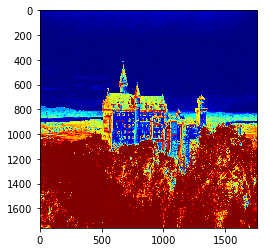

In [168]:
img_bgr = cv2.imread('view.jpg')
img_b = img_bgr[:, :, 0]
img_b = cv2.applyColorMap(img_b, cv2.COLORMAP_JET)
plt.imshow(img_b)
plt.show()

### 8.2 利用 ColorMap 制作任意形状的热图

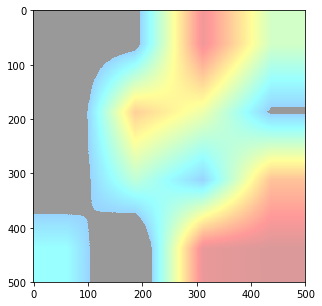

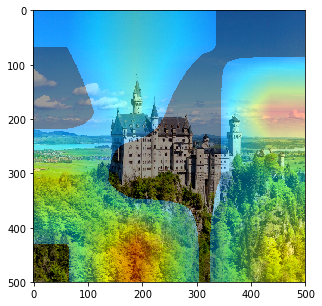

In [153]:
def get_random_heatmap(img=None):

    # 原图像：使用全白图像
    if img is None:
        canvas = 255 * np.ones(shape=(500, 500, 3), dtype=np.uint8)
    else:
        canvas = cv2.resize(img, (500, 500))

    # 热图图像：尺寸要小，随后等比例放大
    contour = np.random.randint(0, 255, size=(4, 4), dtype=np.uint8)
    contour = cv2.resize(contour, (500, 500))

    # 生成对应的三通道热图
    heatmap = cv2.applyColorMap(contour, cv2.COLORMAP_JET)

    # 将较冷区域置灰（透明）
    heatmap[np.where(contour < 70)] = 0

    # 合并原图像与热图
    combined = cv2.addWeighted(src1=canvas, alpha=0.6, src2=heatmap, beta=0.4, gamma=0)

    return combined
    
    
plt.figure(figsize=(5, 5))
plt.imshow(get_random_heatmap()[:, :, ::-1])
plt.show()

img = cv2.imread('view.jpg')
plt.figure(figsize=(5, 5))
plt.imshow(get_random_heatmap(img)[:, :, ::-1])
plt.show()